## September 2024 CVE Data

In [ ]:
# Set the path to the shared data file
data_path = '../../data/nvd.jsonl'
import os
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Data file not found at {data_path}. Please run 'python ../../download_data.py' to download the latest data.")

In [2]:

from IPython.core.magic import register_cell_magic
from IPython.display import Markdown
import calplot
import datetime
from datetime import date
import glob
import json
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

@register_cell_magic
def markdown(line, cell):
    return Markdown(cell.format(**globals()))


logging.getLogger('matplotlib.font_manager').disabled = True
warnings.filterwarnings("ignore")
pd.set_option('display.width', 500)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 10)

In [3]:
row_accumulator = []
for filename in glob.glob('nvd.jsonl'):
    with open(filename, 'r', encoding='utf-8') as f:
        nvd_data = json.load(f)
        for entry in nvd_data:
            cve = entry['cve']['id']
            try:
                assigner = entry['cve']['sourceIdentifier']
            except KeyError:
                assigner = 'Missing_Data'
            try:
                published_date = entry['cve']['published']
            except KeyError:
                published_date = 'Missing_Data'
            try:
                attack_vector = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['attackVector']
            except KeyError:
                attack_vector = 'Missing_Data'
            try:
                attack_complexity = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['attackComplexity']
            except KeyError:
                attack_complexity = 'Missing_Data'
            try:
                privileges_required = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['privilegesRequired']
            except KeyError:
                privileges_required = 'Missing_Data'
            try:
                user_interaction = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['userInteraction']
            except KeyError:
                user_interaction = 'Missing_Data'
            try:
                scope = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['scope']
            except KeyError:
                scope = 'Missing_Data'
            try:
                confidentiality_impact = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['confidentialityImpact']
            except KeyError:
                confidentiality_impact = 'Missing_Data'
            try:
                integrity_impact = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['integrityImpact']
            except KeyError:
                integrity_impact = 'Missing_Data'
            try:
                availability_impact = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['availabilityImpact']
            except KeyError:
                availability_impact = 'Missing_Data'
            try:
                base_score = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['baseScore']
            except KeyError:
                base_score = '0.0'
            try:
                base_severity = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['baseSeverity']
            except KeyError:
                base_severity = 'Missing_Data'
            try:
                exploitability_score = entry['cve']['metrics']['cvssMetricV31'][0]['exploitabilityScore']
            except KeyError:
                exploitability_score = 'Missing_Data'
            try:
                impact_score = entry['cve']['metrics']['cvssMetricV31'][0]['impactScore']
            except KeyError:
                impact_score = 'Missing_Data'
            try:
                cwe = entry['cve']['weaknesses'][0]['description'][0]['value']
            except KeyError:
                cwe = 'Missing_Data'
            try:
                description = entry['cve']['descriptions'][0]['value']
            except IndexError:
                description = ''
            try:
                cve_tag = entry['cve']['cveTags'][0]['tags'] 
            except IndexError:
                cve_tag = np.nan   
            try: 
                vulnStatus = entry['cve']['vulnStatus']
            except IndexError:
                vulnStatus = ''  
            new_row = {
                'CVE': cve,
                'Published': published_date,
                'AttackVector': attack_vector,
                'AttackComplexity': attack_complexity,
                'PrivilegesRequired': privileges_required,
                'UserInteraction': user_interaction,
                'Scope': scope,
                'ConfidentialityImpact': confidentiality_impact,
                'IntegrityImpact': integrity_impact,
                'AvailabilityImpact': availability_impact,
                'BaseScore': base_score,
                'BaseSeverity': base_severity,
                'ExploitabilityScore': exploitability_score,
                'ImpactScore': impact_score,
                'CWE': cwe,
                'Description': description,
                'Assigner' : assigner,
                'Tag' : cve_tag,
                'Status': vulnStatus 
            }
            row_accumulator.append(new_row)
        nvd = pd.DataFrame(row_accumulator)

nvd = nvd[~nvd.Status.str.contains('Rejected')]
nvd['Published'] = pd.to_datetime(nvd['Published'])
thisyear = ((nvd['Published'] > '2024-09-01') & (nvd['Published']  < '2024-10-01'))
nvd = nvd.loc[thisyear]
nvd = nvd.sort_values(by=['Published'])
nvd = nvd.reset_index(drop=True)
nvd['BaseScore'] = pd.to_numeric(nvd['BaseScore']);
nvd['BaseScore'] = pd.to_numeric(nvd['BaseScore']);
nvd['BaseScore'] = nvd['BaseScore'].replace(0, np.nan);
nvdcount = nvd['Published'].count()
nvdunique = nvd['Published'].nunique()
startdate = date(2024, 9, 1)
enddate  = date(2024, 10, 1)
numberofdays = enddate - startdate 
per_day = nvdcount/numberofdays.days


In [4]:
Markdown(f"Total Number of CVEs: **{nvd['CVE'].count()}**<br />Average CVEs Per Day: **{per_day.round(2)}**<br />Average CVSS Score: **{nvd['BaseScore'].mean().round(2)}**")

Total Number of CVEs: **2524**<br />Average CVEs Per Day: **84.13**<br />Average CVSS Score: **6.87**

In [5]:
Markdown(f"## CVE Graphs")

## CVE Graphs

In [6]:
Month_Graph = nvd['Published'].groupby(nvd.Published.dt.to_period("M")).agg('count')
Year_Graph = nvd['Published'].groupby(nvd.Published.dt.to_period("Y")).agg('count')
Week_Graph = nvd['Published'].groupby(nvd.Published.dt.to_period("W")).agg('count')
Day_Graph = nvd['Published'].groupby(nvd.Published.dt.to_period("D")).agg('count')

In [7]:
Markdown(f"### CVE Calendar")

### CVE Calendar

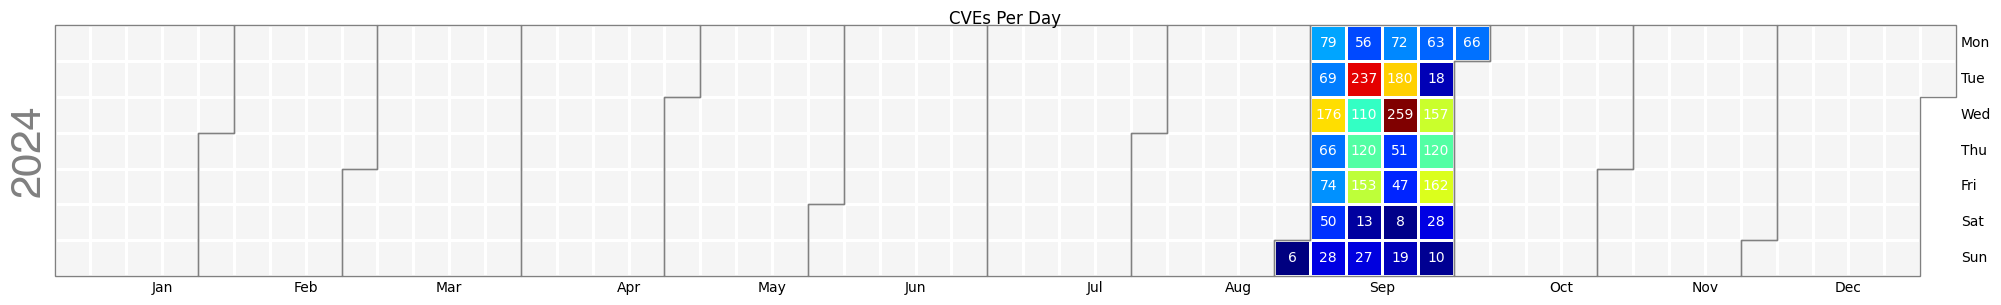

In [8]:
dfs = nvd['Published'].apply(lambda x: pd.to_datetime(x, errors='coerce', format='%Y/%m/%d'))
df = dfs.value_counts()
df = df.to_frame()
df.index = df.index.strftime('%m/%d/%Y')
df.index = pd.to_datetime(df.index, format='%m/%d/%Y')
calplot.calplot(df.T.squeeze(), cmap='jet', dropzero=True, edgecolor="Grey", textcolor="White", textformat='{:.0f}', textfiller='', suptitle='CVEs Per Day', figsize=(25,3));

In [9]:
Markdown(f"### CVE Per Week Graph")

### CVE Per Week Graph

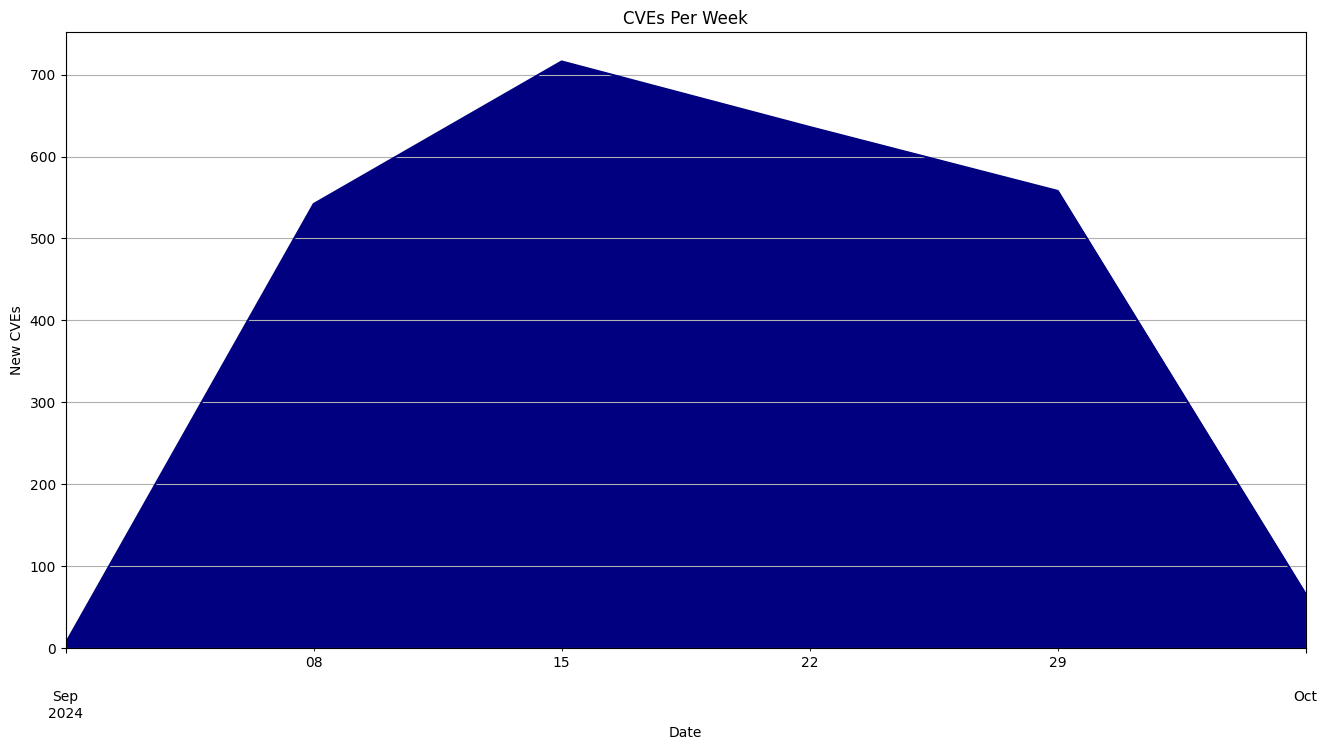

In [10]:

cg = Week_Graph.plot.area(colormap='jet', figsize=(16, 8), title='CVEs Per Week')
plt.grid()
cg.set_ylabel("New CVEs");
cg.set_xlabel("Date");

In [11]:
Markdown(f"### CVE Per Day Graph")

### CVE Per Day Graph

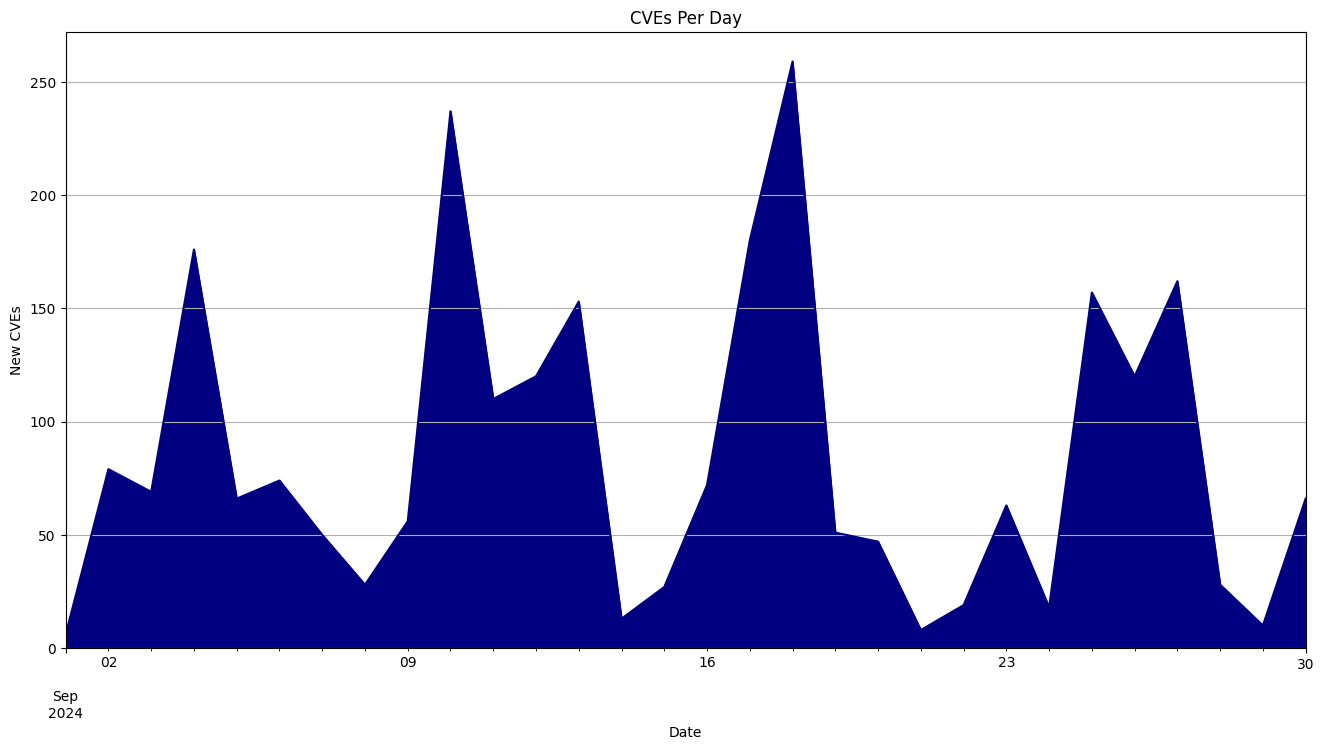

In [12]:

cg = Day_Graph.plot.area(colormap='jet', figsize=(16, 8), title='CVEs Per Day')
plt.grid()
cg.set_ylabel("New CVEs");
cg.set_xlabel("Date");

In [13]:
Markdown(f"## CVSS Data")

## CVSS Data

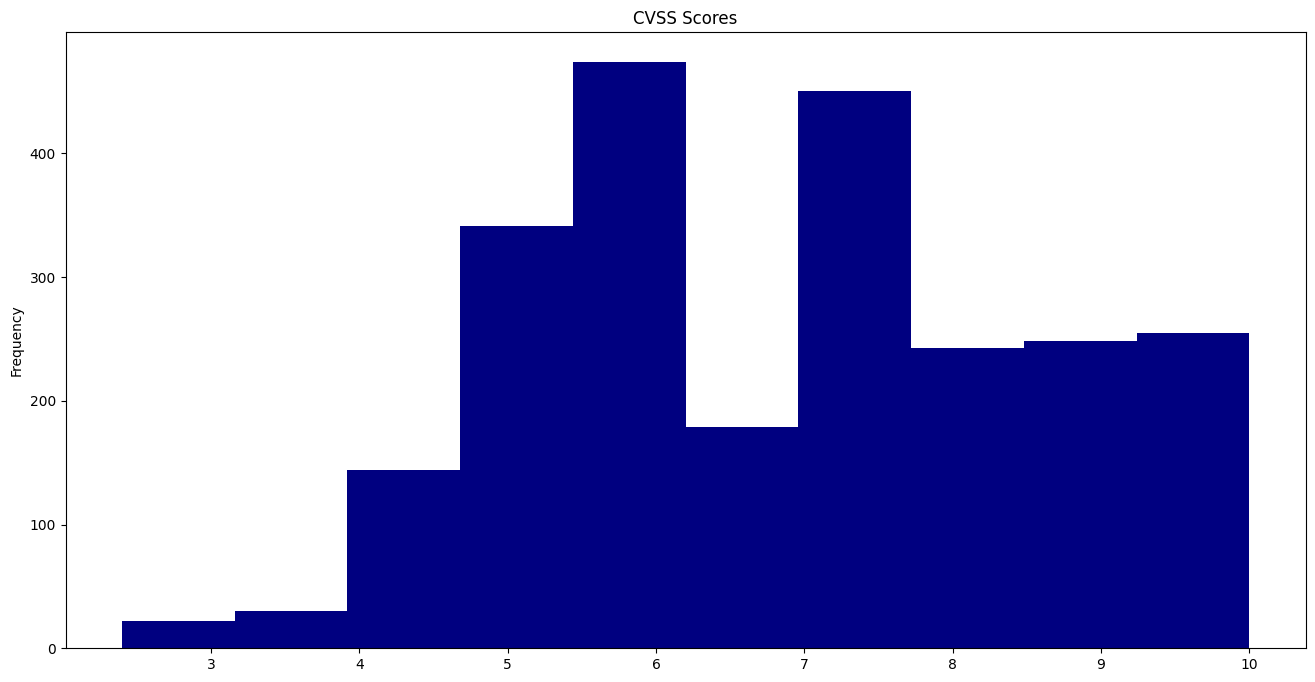

In [14]:
nvd['BaseScore'].plot(kind="hist", colormap='jet', figsize=(16, 8), title='CVSS Scores');

In [15]:
Markdown(f"## CNA Data")

## CNA Data

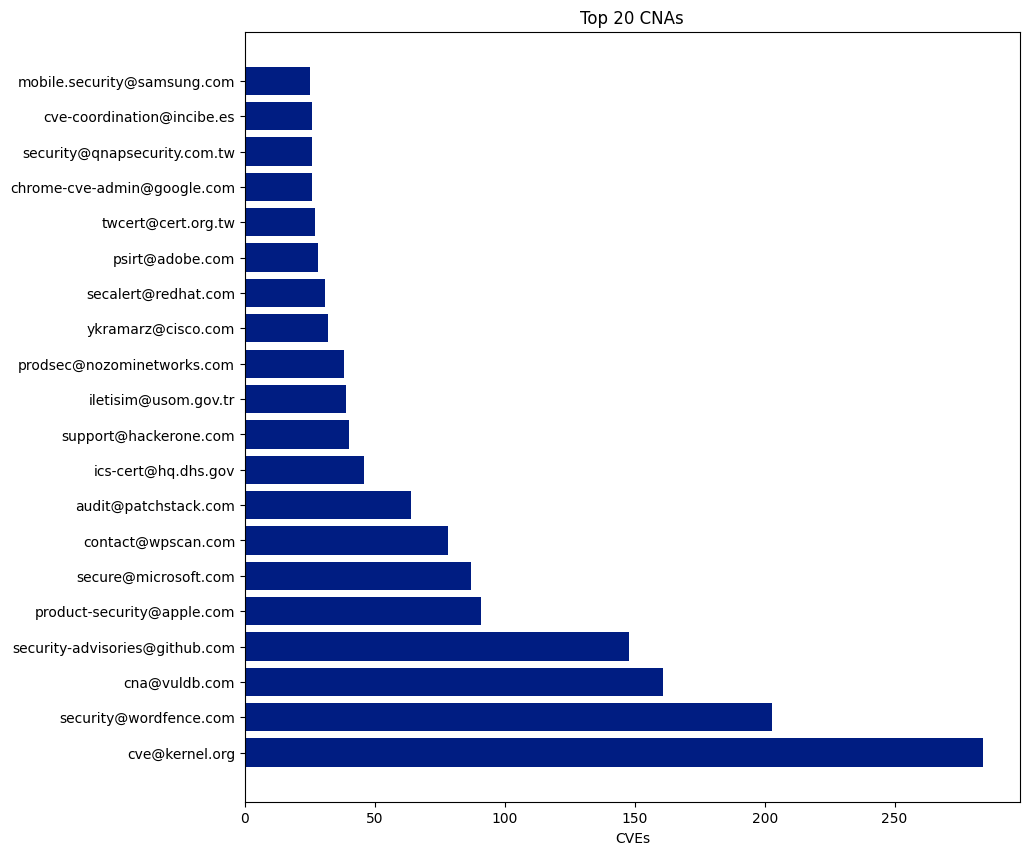

In [16]:
nvd['Assigner'].replace('416baaa9-dc9f-4396-8d5f-8c081fb06d67','cve@kernel.org',inplace=True)
nvd_frequency = nvd['Assigner'].value_counts()
nvd_frequency = nvd_frequency.reset_index()
nvd_frequency.columns = ['Assigner', 'counts']
nvd_frequency[nvd_frequency.counts > 100].head(50)
nvd_frequency_no_mitre = nvd_frequency[~nvd_frequency.Assigner.str.contains('cve@mitre.org')]
nvd_frequency_no_mitre = nvd_frequency_no_mitre.head(20)
plt.figure(figsize=(10,10))
plt.barh("Assigner", "counts", data = nvd_frequency_no_mitre, color="#001d82")
plt.xlabel("CVEs"); 
plt.ylabel("") ;
plt.title("Top 20 CNAs");


In [17]:
Markdown(f"## CWE Data")

## CWE Data

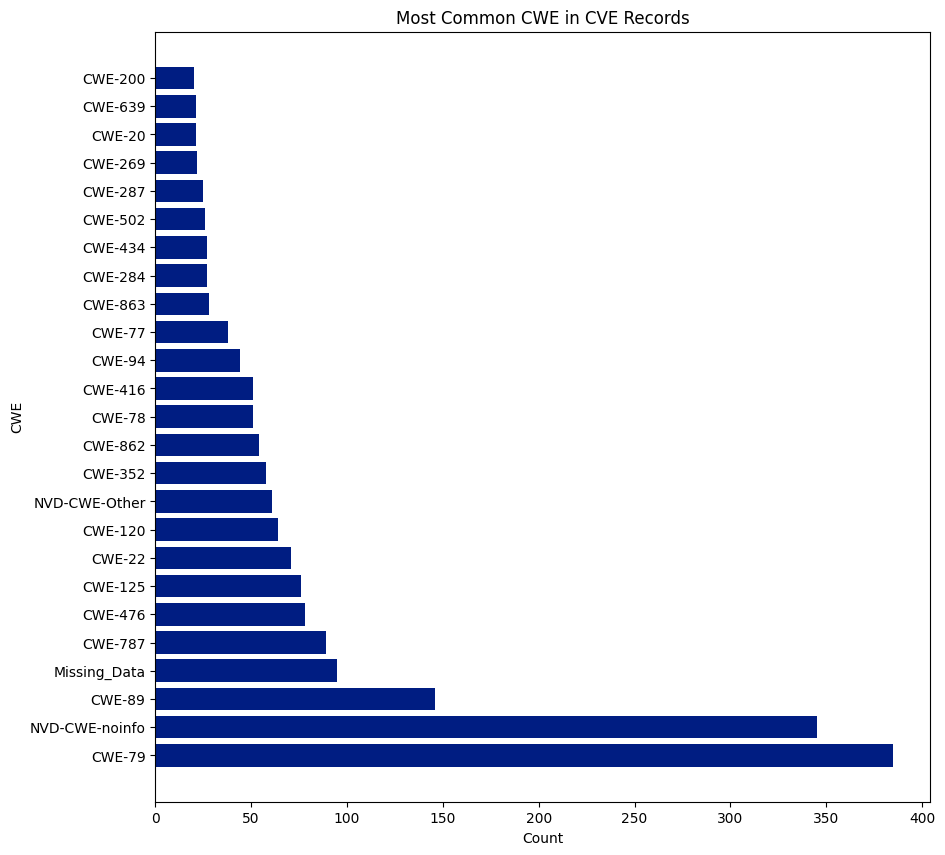

In [18]:
nvd_cwe = nvd['CWE'].value_counts()
nvd_cwe = nvd_cwe.reset_index()
nvd_cwe.columns = ['CWE', 'counts']
nvd_cwe = nvd_cwe.head(25)
plt.figure(figsize=(10,10));
plt.barh("CWE", "counts", data = nvd_cwe, color="#001d82");
plt.xlabel("Count"); 
plt.ylabel("CWE") ;
plt.title("Most Common CWE in CVE Records");


In [19]:
Markdown(f"## More CVE Data")

## More CVE Data

In [20]:
Markdown(f"### Top CNA Assigner")

### Top CNA Assigner

In [21]:
nvd_frequency_no_mitre.style.hide()

Assigner,counts
cve@kernel.org,284
security@wordfence.com,203
cna@vuldb.com,161
security-advisories@github.com,148
product-security@apple.com,91
secure@microsoft.com,87
contact@wpscan.com,78
audit@patchstack.com,64
ics-cert@hq.dhs.gov,46
support@hackerone.com,40


In [22]:
Markdown(f"### CVEs By Identifier")

### CVEs By Identifier

In [23]:

print("CVE-1999-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-1999-')]))
print("CVE-2000-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2000-')]))
print("CVE-2001-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2001-')]))
print("CVE-2002-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2002-')]))
print("CVE-2003-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2003-')]))
print("CVE-2004-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2004-')]))
print("CVE-2005-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2005-')]))
print("CVE-2006-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2006-')]))
print("CVE-2007-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2007-')]))
print("CVE-2008-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2008-')]))
print("CVE-2009-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2009-')]))
print("CVE-2010-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2010-')]))
print("CVE-2011-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2011-')]))
print("CVE-2012-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2012-')]))
print("CVE-2013-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2013-')]))
print("CVE-2014-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2014-')]))
print("CVE-2015-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2015-')]))
print("CVE-2016-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2016-')]))
print("CVE-2017-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2017-')]))
print("CVE-2018-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2018-')]))
print("CVE-2019-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2019-')]))
print("CVE-2020-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2020-')]))
print("CVE-2021-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2021-')]))
print("CVE-2022-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2022-')]))
print("CVE-2023-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2023-')]))
print("CVE-2024-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2024-')]))

CVE-1999-	0
CVE-2000-	0
CVE-2001-	0
CVE-2002-	0
CVE-2003-	0
CVE-2004-	0
CVE-2005-	0
CVE-2006-	0
CVE-2007-	0
CVE-2008-	0
CVE-2009-	0
CVE-2010-	0
CVE-2011-	0
CVE-2012-	0
CVE-2013-	0
CVE-2014-	0
CVE-2015-	0
CVE-2016-	0
CVE-2017-	0
CVE-2018-	1
CVE-2019-	1
CVE-2020-	2
CVE-2021-	12
CVE-2022-	25
CVE-2023-	79
CVE-2024-	2404


In [24]:
Markdown(f"### First 5 CVEs")

### First 5 CVEs

In [25]:
nvd[["CVE", "Description"]].head(5).style.hide()

CVE,Description
CVE-2024-8367,"A vulnerability was found in HM Courts & Tribunals Service Probate Back Office up to c1afe0cdb2b2766d9e24872c4e827f8b82a6cd31. It has been classified as problematic. Affected is an unknown function of the file src/main/java/uk/gov/hmcts/probate/service/NotificationService.java of the component Markdown Handler. The manipulation leads to injection. Continious delivery with rolling releases is used by this product. Therefore, no version details of affected nor updated releases are available. The patch is identified as d90230d7cf575e5b0852d56660104c8bd2503c34. It is recommended to apply a patch to fix this issue."
CVE-2024-8368,A vulnerability was found in code-projects Hospital Management System 1.0. It has been rated as critical. Affected by this issue is some unknown functionality of the file index.php of the component Login. The manipulation of the argument username leads to sql injection. The attack may be launched remotely. The exploit has been disclosed to the public and may be used.
CVE-2024-5053,"The Contact Form Plugin by Fluent Forms for Quiz, Survey, and Drag & Drop WP Form Builder plugin for WordPress is vulnerable to unauthorized Malichimp API key update due to an insufficient capability check on the verifyRequest function in all versions up to, and including, 5.1.18. This makes it possible for Form Managers with a Subscriber-level access and above to modify the Mailchimp API key used for integration. At the same time, missing Mailchimp API key validation allows the redirect of the integration requests to the attacker-controlled server."
CVE-2024-45508,HTMLDOC before 1.9.19 has an out-of-bounds write in parse_paragraph in ps-pdf.cxx because of an attempt to strip leading whitespace from a whitespace-only node.
CVE-2024-45509,"In MISP through 2.4.196, app/Controller/BookmarksController.php does not properly restrict access to bookmarks data in the case where the user is not an org admin."


In [26]:
Markdown(f"### Last 5 CVEs")

### Last 5 CVEs

In [27]:

nvd[["CVE", "Description"]].tail(5).style.hide()

CVE,Description
CVE-2024-7673,"A maliciously crafted DWFX file, when parsed in w3dtk.dll through Autodesk Navisworks, can force a Heap-based Buffer Overflow. A malicious actor can leverage this vulnerability to cause a crash or execute arbitrary code in the context of the current process."
CVE-2024-7674,"A maliciously crafted DWF file, when parsed in dwfcore.dll through Autodesk Navisworks, can force a Heap-based Buffer Overflow. A malicious actor can leverage this vulnerability to cause a crash or execute arbitrary code in the context of the current process."
CVE-2024-7675,"A maliciously crafted DWF file, when parsed in w3dtk.dll through Autodesk Navisworks, can force a Use-After-Free. A malicious actor can leverage this vulnerability to cause a crash or execute arbitrary code in the context of the current process."
CVE-2024-45073,IBM WebSphere Application Server 8.5 and 9.0 is vulnerable to stored cross-site scripting. This vulnerability allows a privileged user to embed arbitrary JavaScript code in the Web UI thus altering the intended functionality potentially leading to credentials disclosure within a trusted session.
CVE-2024-9194,"Improper Neutralization of Special Elements used in an SQL Command ('SQL Injection') vulnerability in Linux and Microsoft Windows Octopus Server on Windows, Linux allows SQL Injection.This issue affects Octopus Server: from 2024.1.0 before 2024.1.13038, from 2024.2.0 before 2024.2.9482, from 2024.3.0 before 2024.3.12766."
